<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your instructional team.

---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

# This setting widens how many characters pandas will display 
# in a column:
pd.options.display.max_colwidth = 400

---

## Load data

In [3]:
df = pd.read_csv('data/mypersonality_noprofanity.csv')

# NOTICE! Do read the commented out code below...
# df = pd.read_csv('data/mypersonality_noprofanity.csv') 
# comment out above & 
# uncomment this to use mypersonality_noprofanity.csv if it 
# makes you more comfortable

df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 
                 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 
                 'TRANSITIVITY'], inplace=True)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

**Create a new column called `status_length` that contains the length of each status:**

In [4]:
df['status_length'] = [len(df['STATUS'][i]) for i in range(len(df['STATUS']))]

**Create a new column called `status_word_count` that contains the number of words in each status:**

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [5]:
df['status_word_count'] = [len(df['STATUS'][i].split()) for i in range(len(df['STATUS']))]

### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

**Show the five longest and five shortest statuses based off of `status_word_count`:**

In [6]:
# Five longest statuses
df[['STATUS', 'status_word_count']].sort_values(by='status_word_count', ascending=False)[:5]

,STATUS,status_word_count
468,"Exact words when renewing DL: Me: Oh no, you can't take my license, It's my 25th b-day. How am I going to get into the bar? DMV: We gonna give you a new one over there Me: But, it won't have my picture and stuff on it. Dmv: Hold up, we can take a picture of your picture and put it on a license i think. (yelling at co-worker to see if this can be done) Yup! Me: So, I can go to the bar?! Dmv: ...",89
4997,"can't believe it. I got the new Wii Fit Plus game, it has a lot of fun new games and features. However, after not using the wii fit for a few months we decided to do the fitness test stuff again. Me(since last time): +2.9 lbs, still a healthy weight and BMI, wii age 54. *PROPNAME*: -8.6lbs, reccommends a healthy weight of gaining 6lbs, wii age 32. On the positive side, I have lost 5 of the 8 l...",84
5457,"I always make it a rule to let the other fellow fire first. If a man wants to fight, I argue the question with him and try to show him how foolish it would be. If he can't be dissuaded, why then the fun begins but I always let him have first crack. Then when I fire, you see, I have the verdict of self-defence on my side. I know that he is pretty certain in his hurry, to miss. I never do.",83
9301,I was totally freaked out tonight while driving home with Janice at 12am. The black coupe next to me matched my speed even though I was going fast and then he continued to match me speed as I slowed down. So I turn to look at the driver of the car and he's wearing a mask. A rubber mask reminiscent to freddy cruger. 0_0 I almost had a heart attack. I then slowed down a lot and he continued on.....,83
9259,"- so, this morning *PROPNAME* gets up to play and he goes over to the carpet where the light was shining through the blinds casting shadows...he then proceeds to tell me the different letters the sun is making on the carpet... 'I', 'T' and 'L' to be exact! He then somehow figured out how to cast his shadow over the sun to make the letters change & disappear! At this rate, he will be smarter th...",82


In [7]:
# Five shortest statuses
df[['STATUS', 'status_word_count']].sort_values(by='status_word_count', ascending=True)[:5]

,STATUS,status_word_count
1957,:'(,1
7565,tgiff,1
7573,blah,1
9090,SLEEP...,1
3696,Finals.,1


## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

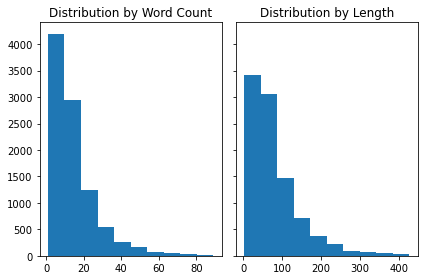

In [8]:
import warnings
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df['status_word_count'])
axs[1].hist(df['status_length'])
axs[0].set_title('Distribution by Word Count')
axs[1].set_title('Distribution by Length')
fig.show();

Distribution of both word_count and length show heavily right-skew

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

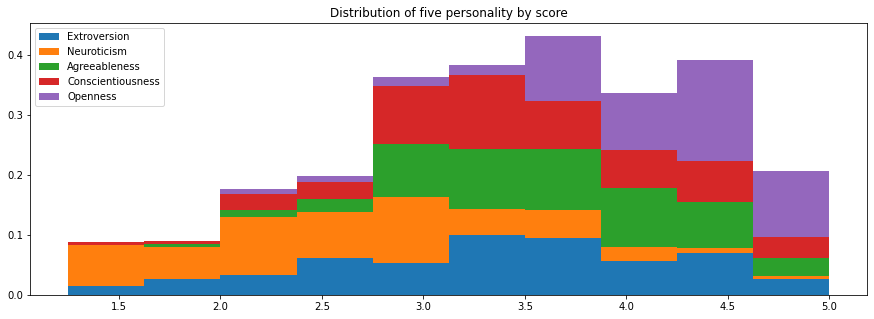

In [9]:
plt.figure(figsize=(15,5))
plt.hist(x=df[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']], stacked=True, density=True, 
         label= ['Extroversion','Neuroticism','Agreeableness','Conscientiousness','Openness'])

plt.title('Distribution of five personality by score');
plt.legend();

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [10]:
df.shape

(9513, 15)

In [11]:
num_unique =  df['#AUTHID'].nunique()
print(f'There are: {num_unique} unique users.')
print(f'Posts per user: {round(9513/num_unique, 2)} posts/user')

There are: 250 unique users.
Posts per user: 38.05 posts/user


## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

**Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:**

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

In [12]:
unique_users = df[['#AUTHID','sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
                   'cNEU', 'cAGR', 'cCON', 'cOPN']].drop_duplicates()
unique_users.shape

(250, 11)

**Plot the distribution of personality scores for `unique_users`:**

Do the distributions look different? Here, each individual user will only be represented once.

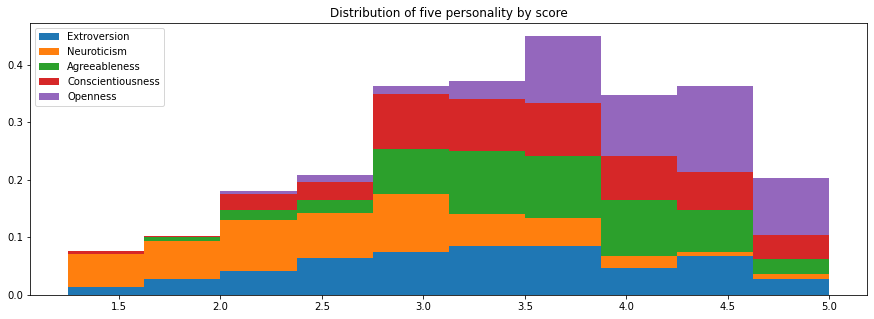

In [13]:
plt.figure(figsize=(15,5))
plt.hist(x=unique_users[['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']], stacked=True, density=True, 
         label= ['Extroversion','Neuroticism','Agreeableness','Conscientiousness','Openness'])

plt.title('Distribution of five personality by score');
plt.legend();

The distribution of new dataframe 'unique_users' is similar to the old dataframe which is lef-skew

**Use the `.describe()` method on `unique_users`:**

In [14]:
unique_users.describe()

,sEXT,sNEU,sAGR,sCON,sOPN
count,250.000000,250.000000,250.000000,250.000000,250.00000
mean,3.292120,2.627240,3.600320,3.522920,4.07856
std,0.861368,0.776835,0.670758,0.740211,0.57506
min,1.330000,1.250000,1.650000,1.450000,2.25000
25%,2.662500,2.000000,3.150000,3.000000,3.75000
50%,3.300000,2.590000,3.660000,3.500000,4.15000
75%,4.000000,3.150000,4.100000,4.050000,4.50000
max,5.000000,4.750000,5.000000,5.000000,5.00000


### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

- Plots: distrubition is easier to understand with plotting
- Tables: STD, mean, min, max are easier to understand with table of summary statistics

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Bar charts of users per category per trait
- Seaborn correlation heatmap
- Seaborn pairplot

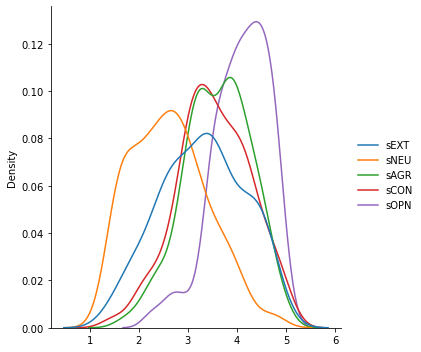

In [15]:
sns.displot(unique_users, kind='kde');

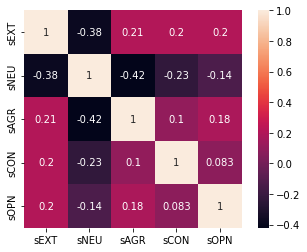

In [16]:
sns.heatmap(unique_users.corr(), annot=True, square=True);

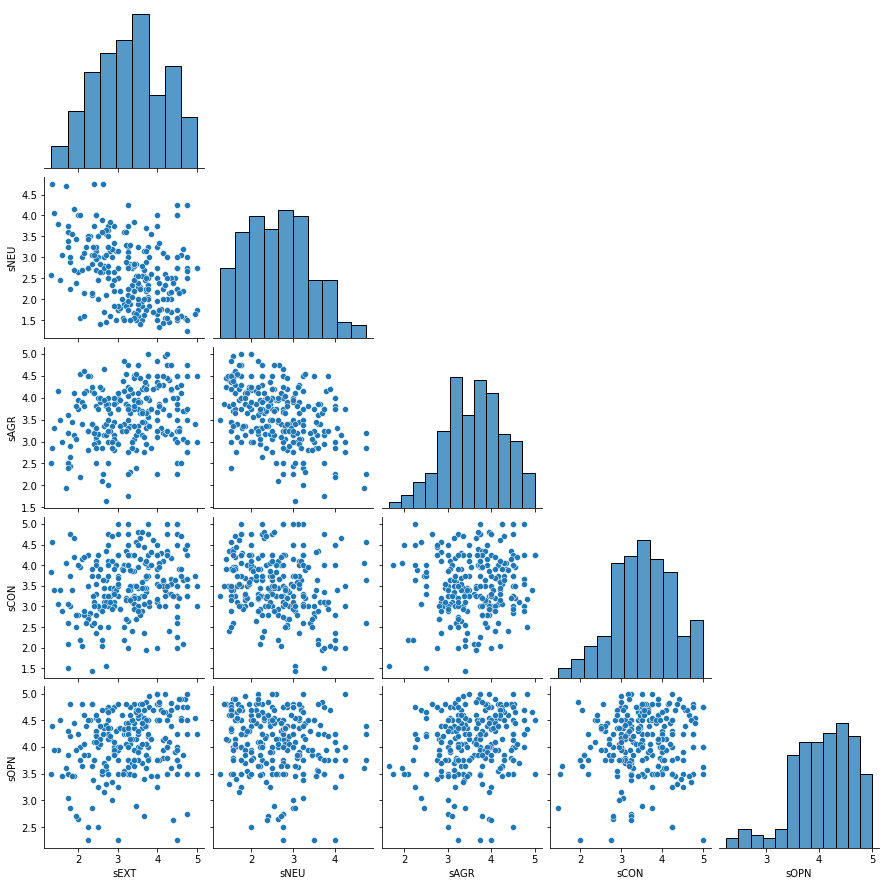

In [17]:
sns.pairplot(unique_users, corner=True);

---

## Exploring status length and word count based on personality

**Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.**

You'll need to use `groupby()` five separate times for this.

In [18]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'status_length',
       'status_word_count'],
      dtype='object')

In [19]:
print(df.groupby('cEXT')['status_word_count', 'status_length'].mean().round(2))
print()
print(df.groupby('cNEU')['status_word_count', 'status_length'].mean().round(2))
print()
print(df.groupby('cAGR')['status_word_count', 'status_length'].mean().round(2))
print()
print(df.groupby('cCON')['status_word_count', 'status_length'].mean().round(2))
print()
print(df.groupby('cOPN')['status_word_count', 'status_length'].mean().round(2))

      status_word_count  status_length
cEXT                                  
n                 13.97          77.50
y                 14.52          80.76

      status_word_count  status_length
cNEU                                  
n                 14.37          79.92
y                 13.91          77.14

      status_word_count  status_length
cAGR                                  
n                 14.17          78.56
y                 14.22          79.19

      status_word_count  status_length
cCON                                  
n                 14.28           79.5
y                 14.11           78.2

      status_word_count  status_length
cOPN                                  
n                 14.73          81.65
y                 14.02          77.96


**Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts for posts by users who score both high (`y`) and low (`n`) in that personality category:**

In [20]:
y = pd.DataFrame(df.loc[df['cOPN'].eq('y')])
n = pd.DataFrame(df.loc[df['cOPN'].eq('n')])

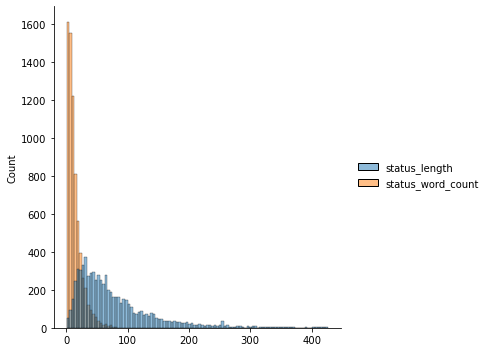

In [21]:
# High cOPN distribution
sns.displot(y[['cOPN', 'status_length', 'status_word_count']]);

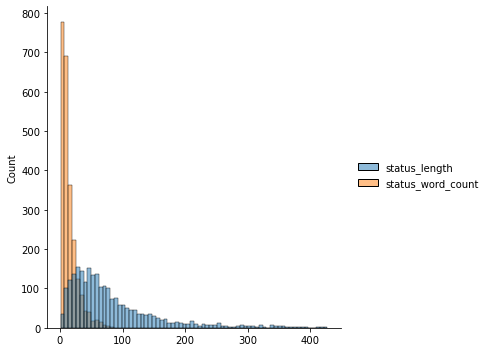

In [22]:
# Low COPN distribution
sns.displot(n[['cOPN', 'status_length', 'status_word_count']]);

Similar distribution with diferrence in max values

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

In [23]:
# Initiate Count Vectorizer
cv = CountVectorizer(stop_words='english')
# fit_transform statuses and store as statuses variable
statuses = cv.fit_transform(df['STATUS'])
# convert to dataframe
statuses = pd.DataFrame(statuses.toarray(), columns = cv.get_feature_names_out())
statuses.shape

(9513, 14665)

### Show the 15 most common words

In [24]:
statuses.sum().sort_values(ascending=False).head(15)

propname    1247
just         670
day          512
like         459
time         408
going        392
today        387
new          374
work         358
good         339
night        300
got          293
love         275
happy        267
tomorrow     263
dtype: int64

### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

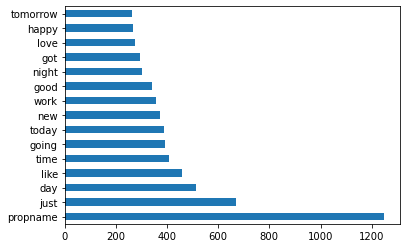

In [25]:
statuses.sum().sort_values(ascending=False).head(15).plot(kind='barh');

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

In [26]:
df[df['STATUS'].str.contains('propname', case=False, regex=False)][:10]

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
6,b7b7764cfa1c523e4e93ab2a79a946c4,"saw a nun zombie, and liked it. Also, *PROPNAME* + Tentacle!Man + Psychic Powers = GREAT Party.",2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,06/27/09 05:41 AM,95,17
18,b7b7764cfa1c523e4e93ab2a79a946c4,"is tired. *PROPNAME*, let me go to sleep pl0x.",2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,07/11/09 05:44 AM,46,9
69,b7b7764cfa1c523e4e93ab2a79a946c4,has a fair idea of how to manage the 2.5 kids cliche... She just needs a very strong gentleman named *PROPNAME* and thriteen wet napkins.,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,11/24/09 05:07 AM,137,25
100,b7b7764cfa1c523e4e93ab2a79a946c4,has a serious crush on *PROPNAME*. <3,2.65,3.00,3.15,3.25,4.40,n,y,n,n,y,01/25/10 02:57 AM,37,7
103,318bf822d4f2bd3920367560218619c0,Mondays are the new thursdays- anthony bourdain + *PROPNAME* = forgetting your financial troubles,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,06/23/09 05:41 AM,98,14
117,318bf822d4f2bd3920367560218619c0,is *PROPNAME*'s bestbian,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,08/23/09 06:03 AM,24,3
136,318bf822d4f2bd3920367560218619c0,is in love with *PROPNAME*.,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,10/04/09 03:09 AM,27,5
154,318bf822d4f2bd3920367560218619c0,is in love. With *PROPNAME*.,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,12/11/09 05:35 AM,28,5
165,318bf822d4f2bd3920367560218619c0,Ten Movies to Watch Right Now (and some you can Instant Netflix) 1. La Vie En Rose 2. Shrink (if you love LA) 3. Paris Je'taime (if you love Paris) 3. Clay Pidgeons (*PROPNAME* is priceless) 4. Quills 5. Away We Go 6. Sunshine Cleaning 7. A League of Their Own 8. Smart People (I Heart *PROPNAME*'s Page and SJP) 9. Frost//Nixon 10. Doubt,4.50,4.00,3.00,4.50,3.75,y,y,n,y,n,10/11/09 01:39 AM,338,64
197,ecbddbfe00e0f83cfdb802a7186061c7,"ATTENTION EVERYONE!!! Vote for the short ""AFTER HOURS"" to support *PROPNAME* - our local Michigan talent and a wonderful person. Repost please!!! http:////www.thirteen.org//sites//reel13//category//vote//",4.30,2.15,3.60,3.30,4.10,y,n,y,n,y,11/24/09 07:11 AM,204,23


**Provide a short explanation of what you believe `propname` to be:**

I believed that propname is the name of the user profile property.

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

**Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:**

In [27]:
statuses.columns

Index(['00', '000', '000ft', '00am', '00pm', '01', '02', '02pm', '03', '0330',
       ...
       'zzz', 'zzzz', 'zzzzz', 'zzzzzzzzzzzz', 'zzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzz', 'âºâ', 'ãªtre', 'ãºltimas', 'ãºltimos'],
      dtype='object', length=14665)

In [28]:
text_and_scores = pd.concat([df['cAGR'], statuses], axis=1)
text_and_scores.shape

(9513, 14666)

**Show the 25 most common words for statuses from high-cAGR users:**

In [29]:
# show 25 most common words form high-cAGR
text_and_scores[text_and_scores['cAGR'] == 'y'].drop('cAGR', axis=1).sum().sort_values(ascending=False)[:25]

propname    668
just        385
day         290
like        259
today       213
time        211
work        201
good        194
new         190
going       190
happy       164
love        163
night       156
got         150
tomorrow    150
know        147
people      139
life        131
tonight     127
home        123
really      119
don         108
weekend     104
want        102
ll           98
dtype: int64

**Show the 25 most common words for statuses from low-cAGR users:**

In [30]:
text_and_scores[text_and_scores['cAGR'] == 'n'].drop('cAGR', axis=1).sum().sort_values(ascending=False)[:25]

propname    579
just        285
day         222
going       202
like        200
time        197
new         184
today       174
work        157
good        145
night       144
got         143
home        130
tonight     123
tomorrow    113
life        113
really      112
love        112
know        111
don         111
happy       103
think       101
people       99
want         98
week         96
dtype: int64

### (BONUS) Most common bigrams:

This is a bonus section and not required (**_though highly recommended_**).

Find the 10 most common [bigrams](https://en.wikipedia.org/wiki/Bigram) in the dataset.

### (BONUS) Most common trigrams:

This is a bonus section and not required (**_though highly recommended_**).

Find the 10 most common [trigrams](https://en.wikipedia.org/wiki/Trigram) in the dataset.

---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

In [72]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'status_length',
       'status_word_count'],
      dtype='object')

##### Which personality redact personal names the most in their statuses

In [100]:
print('Openness:', df[df['cOPN'] == 'y']['STATUS'].str.contains('propname', case=False, regex=False).shape)
print('Agreeableness:', df[df['cAGR'] == 'y']['STATUS'].str.contains('propname', case=False, regex=False).shape)
print('Conscientiousness:', df[df['cCON'] == 'y']['STATUS'].str.contains('propname', case=False, regex=False).shape)
print('Extroversion:', df[df['cEXT'] == 'y']['STATUS'].str.contains('propname', case=False, regex=False).shape)
print('Neuroticism:', df[df['cNEU'] == 'y']['STATUS'].str.contains('propname', case=False, regex=False).shape)

Openness: (7099,)
Agreeableness: (5100,)
Conscientiousness: (4423,)
Extroversion: (4076,)
Neuroticism: (3512,)


#### Is count of uppercases/lowercases/numbers/special characters related to any personality category or personality score?

In [86]:
def Count(str):
    upper, lower, number, special = 0, 0, 0, 0
    for i in range(len(str)):
        if str[i].isupper():
            upper += 1
        elif str[i].islower():
            lower += 1
        elif str[i] >= '0' and str[i] <= '9':
            number += 1
        else:
            special += 1
        
    print(f'Upper case letters: {upper}')
    print(f'Lower case letters: {lower}' )
    print(f'Number characters : {number}')
    print(f'Special characters: {special}')
    print('')
    
print('Openess')    
Count((df[df['cOPN'] == 'y']['STATUS']).sum())
print('Agreeable')
Count((df[df['cAGR'] == 'y']['STATUS']).sum())
print('Conscientiousness')
Count((df[df['cCON'] == 'y']['STATUS']).sum())
print('Extroversion')
Count((df[df['cEXT'] == 'y']['STATUS']).sum())
print('Neurotism')
Count((df[df['cNEU'] == 'y']['STATUS']).sum())

Openess
Upper case letters: 28826
Lower case letters: 394894
Number characters : 2931
Special characters: 126769

Agreeable
Upper case letters: 21091
Lower case letters: 287635
Number characters : 2330
Special characters: 92801

Conscientiousness
Upper case letters: 18168
Lower case letters: 246909
Number characters : 1750
Special characters: 79041

Extroversion
Upper case letters: 17321
Lower case letters: 234133
Number characters : 2282
Special characters: 75425

Neurotism
Upper case letters: 14656
Lower case letters: 192451
Number characters : 1401
Special characters: 62406



<b>types of letter and character vary in each personality</b>

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as **_explanatory_**. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.

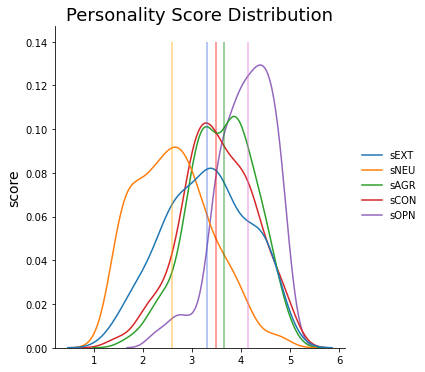

In [182]:
sns.displot(unique_users, kind='kde')
plt.ylabel('score', fontsize=14)
plt.title('Personality Score Distribution', fontsize=18)

plt.vlines(unique_users['sEXT'].median(), ymin=0, ymax=0.14, color='royalblue', alpha=0.5)
plt.vlines(unique_users['sNEU'].median(), ymin=0, ymax=0.14, color='orange', alpha=0.5)
plt.vlines(unique_users['sAGR'].median(), ymin=0, ymax=0.14, color='green', alpha=0.5)
plt.vlines(unique_users['sCON'].median(), ymin=0, ymax=0.14, color='red', alpha=0.5)
plt.vlines(unique_users['sOPN'].median(), ymin=0, ymax=0.14, color='orchid', alpha=0.5)

plt.show();

Personality scores distribution are vary in each personalities as well as the median value (vertical line)

Extroversion, Conscientiousness, and Agreeableness median values are close to each other

Neurotism mean value is the lowest and Openness mean value is the highest

